# Salmon Price Time Series Forecasting

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

## Data Preparation and Exploration

In [165]:
df = pd.read_html('fish-data.html')
df = df[0]
df

,Month,Price,Change
0,May 1994,5.43,-
1,Jun 1994,5.46,0.55%
2,Jul 1994,5.24,-4.03%
3,Aug 1994,5.02,-4.20%
4,Sep 1994,5.28,5.18%
...,...,...,...
355,Dec 2023,8.28,9.96%
356,Jan 2024,10.21,23.31%
357,Feb 2024,10.27,0.59%
358,Mar 2024,10.16,-1.07%


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   360 non-null    object 
 1   Price   360 non-null    float64
 2   Change  360 non-null    object 
dtypes: float64(1), object(2)
memory usage: 8.6+ KB


data has 360 entries with no missing data entries. The next steps are parsing the Month to become a Date column and to parse the Change column into decimal form

In [167]:
df.shape

(360, 3)

In [168]:
df.describe()

,Price
count,360.000000
mean,5.363833
std,1.857991
min,2.400000
25%,3.860000
50%,5.025000
75%,6.690000
max,11.250000


At first glance, the variance of salmon price is around 5 dollars with a standard deviation of around 2 dollars.

In [169]:
df.columns

Index(['Month', 'Price', 'Change'], dtype='object')

In [170]:
df.rename(columns= {'Month': 'Date'}, inplace= True)
df.head()

,Date,Price,Change
0,May 1994,5.43,-
1,Jun 1994,5.46,0.55%
2,Jul 1994,5.24,-4.03%
3,Aug 1994,5.02,-4.20%
4,Sep 1994,5.28,5.18%


In [171]:
#convert to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Price,Change
0,1994-05-01,5.43,-
1,1994-06-01,5.46,0.55%
2,1994-07-01,5.24,-4.03%
3,1994-08-01,5.02,-4.20%
4,1994-09-01,5.28,5.18%


In [172]:
#parse Change column to usable format

df['Change'] = df['Change'][1:].apply(lambda x: x[0:-1]).astype(float)
df['Change'] = df['Change'] / 100
df = df[['Date', 'Change', 'Price']]
df.rename(columns= {'Change': 'Change in decimal'}, inplace= True)

df.head()

,Date,Change in decimal,Price
0,1994-05-01,NaN,5.43
1,1994-06-01,0.0055,5.46
2,1994-07-01,-0.0403,5.24
3,1994-08-01,-0.0420,5.02
4,1994-09-01,0.0518,5.28


In [173]:
df.dtypes

,0
Date,datetime64[ns]
Change in decimal,float64
Price,float64


We have converted given featues to correct datatypes for more exploratory use

## Data Exploration

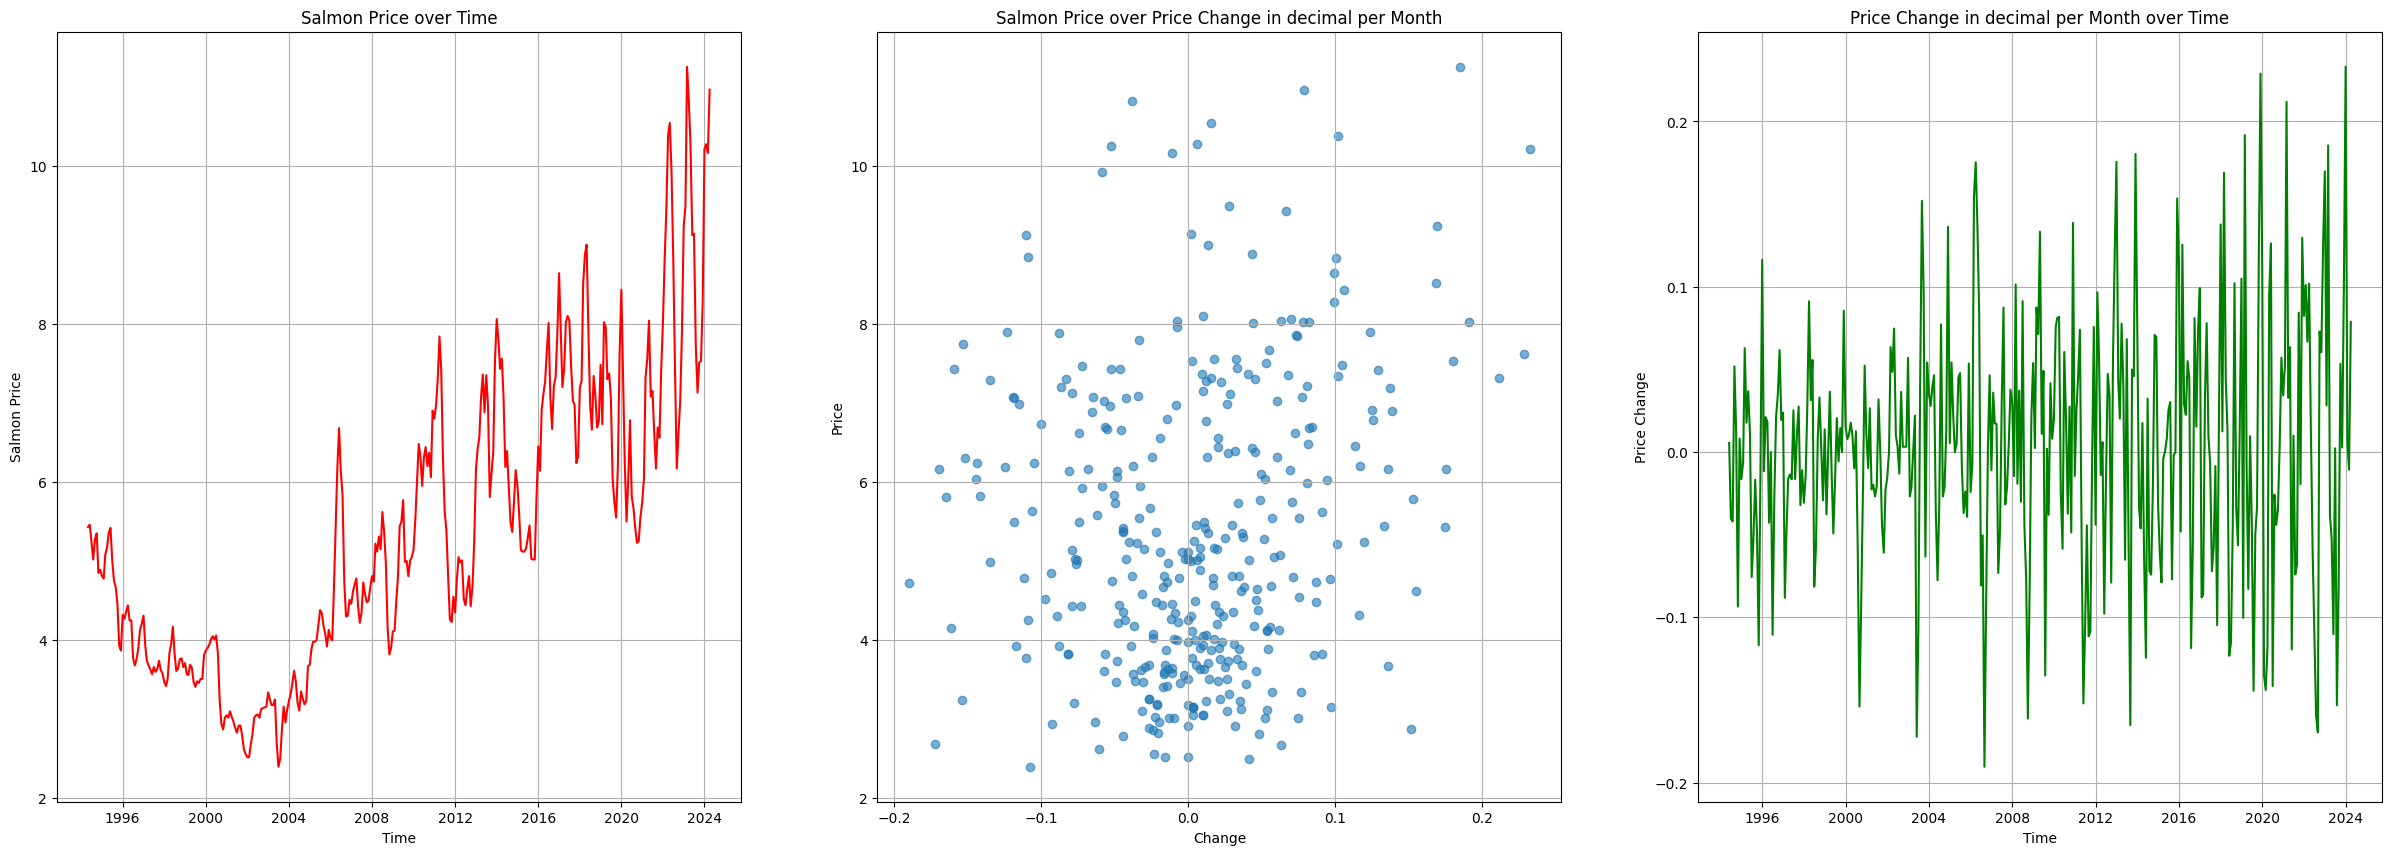

In [174]:
plt.figure(figsize = (30,10))
plt.subplot(1,3,1)
plt.title('Salmon Price over Time')
plt.xlabel('Time')
plt.ylabel('Salmon Price')
plt.plot(df['Date'], df['Price'], color= 'r')
plt.grid(True)

plt.subplot(1,3,2)
plt.title('Salmon Price over Price Change in decimal per Month')
plt.xlabel('Change')
plt.ylabel('Price')
plt.scatter(df['Change in decimal'], df['Price'], alpha= .6)
plt.grid(True)

plt.subplot(1,3,3)
plt.title('Price Change in decimal per Month over Time')
plt.xlabel('Time')
plt.ylabel('Price Change')
plt.plot(df['Date'], df['Change in decimal'], color= 'g')
plt.grid(True)

plt.show()

These 3 plots aim to explore the relationship between dependent variables and also our target variable, price. Salmon price over time seems to follow a seasonal trend that is represented by its many jagged valleys and peaks. Initially salmon price trends downwards until around 2004, where a seasonal and linear trend occurs until 2024. From around 2020-2024 the price seems to be extremely volatile with high peaks and low valleys. There seems to be little to no correlation when we look at the relationship between price change per month in decimal form and price, this similarly follows for price change per month over date time. Let us isolate a time period to see more closely how the seasonality of salmon pricing works.

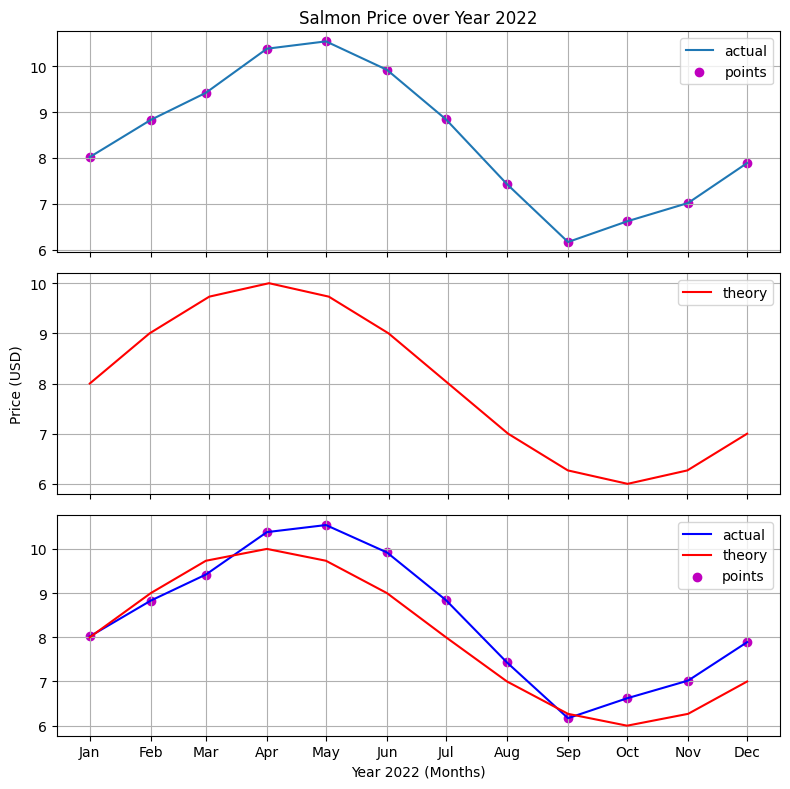

In [175]:
dates_of_2022 = df[(df['Date'] >= '2022-01-01') & (df['Date'] < '2023-01-01')]['Date']
prices_of_2022 = df[(df['Date'] >= '2022-01-01') & (df['Date'] < '2023-01-01')]['Price']
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

x = [2*np.pi*i/12 for i in range(0,12)]
theory = [2*np.sin(i) + 8 for i in x]

plt.figure(figsize= (8,8))
plt.subplot(3,1,1)
plt.title('Salmon Price over Year 2022')
plt.plot(dates_of_2022, prices_of_2022, label= 'actual')
plt.scatter(dates_of_2022, prices_of_2022, color= 'm', label='points')
plt.xticks(ticks= dates_of_2022, labels= [])
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.subplot(3,1,2)
plt.plot(x, theory, color= 'red', label= 'theory')
plt.xticks(ticks= x, labels= [])
plt.grid(True)
plt.legend()
plt.ylabel('Price (USD)')


plt.subplot(3,1,3)
plt.plot(dates_of_2022, prices_of_2022, color= 'blue', label= 'actual')
plt.plot(dates_of_2022, theory, color= 'red', label= 'theory')
plt.scatter(dates_of_2022, prices_of_2022, color= 'm', label= 'points')
plt.xticks(ticks= dates_of_2022, labels= labels)
plt.xlabel('Year 2022 (Months)')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

Salmon Price throughout the year in 2022 seems to follow a sinusoidal pattern, where at the beginning of the year it follows a steay linear trend to around 10.50 in May before following a downwards trend to September where the price of the fish is at a minimum of 6.00 for the year before returing back to around the starting price of the year, around 8 dollars. The price changes throughout the year can indicate salmon migration patterns in Norway because the drop in price for the summer period can indicate that Salmon are ready to spawn and head up stream which causes an influx of Salmon in the area causing prices to lower. In seasons like the winter, where salmon is not in season, we can expect an upwards trend in price before climaxing right, when the salmon season starts. This understanding of seasonality offers new features and helps us understand the pricing of salmon much better.

## Feature Engineering

In [176]:
import datetime as dt

In [177]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Month_sin'] = np.sin(2*np.pi*df['Month']/12) # to model seasonal patterns
df['Month_cos'] = np.cos(2*np.pi*df['Month']/12) # to model seasonal patterns
df['lag_1'] = df['Price'].shift(1) # previous month price
df['lag_2'] = df['Price'].shift(2) # previpous 2 months ago price
df['lag_3'] = df['Price'].shift(3) # previous 3 months ago price
df['rolling_avg_3'] = df['Price'].rolling(window= 3).mean() # average of past 3 months price
df.head()

,Date,Change in decimal,Price,Year,Month,Quarter,Month_sin,Month_cos,lag_1,lag_2,lag_3,rolling_avg_3
0,1994-05-01,NaN,5.43,1994,5,2,5.000000e-01,-8.660254e-01,NaN,NaN,NaN,NaN
1,1994-06-01,0.0055,5.46,1994,6,2,1.224647e-16,-1.000000e+00,5.43,NaN,NaN,NaN
2,1994-07-01,-0.0403,5.24,1994,7,3,-5.000000e-01,-8.660254e-01,5.46,5.43,NaN,5.376667
3,1994-08-01,-0.0420,5.02,1994,8,3,-8.660254e-01,-5.000000e-01,5.24,5.46,5.43,5.240000
4,1994-09-01,0.0518,5.28,1994,9,3,-1.000000e+00,-1.836970e-16,5.02,5.24,5.46,5.180000


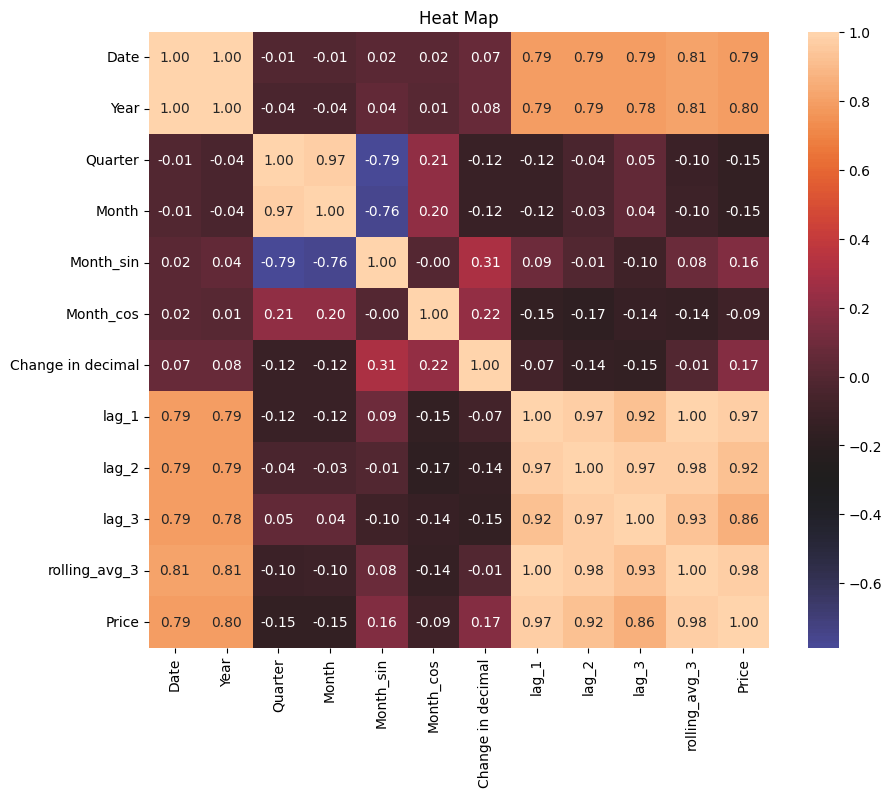

In [178]:
columns_ordered = [
                    'Date', 'Year', 'Quarter', 'Month',
                    'Month_sin', 'Month_cos', 'Change in decimal',
                    'lag_1', 'lag_2','lag_3','rolling_avg_3',
                    'Price'
                    ]
df = df[columns_ordered]
fig, ax = plt.subplots(figsize= (10,8))
ax.set_title('Heat Map')
sns.heatmap(df.corr(), annot= True, fmt = '.2f', ax=ax, center= -.3)
plt.show()

This correlation plot explains the relationships between all variables. The price variable is strongly correlated to all the lag features as well as the year feature. there is also low correlation between the sinusoidal month transformation and change in decimal transformation. Knowing these relationships will be useful for what key features we want to feed our model, however, it will still be useful to keep some of these low correlated features as this plot tells us which features that are strongly linearly correlated, some features may have non-linear relationships that will be able to be found and used by some more complex models.

## Simple Linear Regression

### Model Training

In [179]:
#imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [180]:
num_samples = len(df)
test_size = num_samples*.2
split_point = num_samples - int(test_size)

X_train = df['Year'][:split_point]
X_test = df['Year'][split_point:]
y_train = df['Price'][:split_point]
y_test = df['Price'][split_point:]

Since we are dealing with time series data, the order of the data matters, so we will select the first 80% of examples to be our training set and the remaining 20% of the data to be our test set that we want to forecast on.

In [181]:
X_train.shape #verifying shape is correct

(288,)

In [182]:
X_train, X_test = X_train.values.reshape(-1,1), X_test.values.reshape(-1,1)

Here we transform the training and testing sets to be arrays rather than pandas series' so we can use it in our model

In [183]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

### Model Exploration and Evaluation

In [184]:
reg.coef_, reg.intercept_

(array([0.1493316]), -294.72965269763415)

In [185]:
def regression_line(a, b, data):
    return a*data + b

reg_line = regression_line(reg.coef_[0], reg.intercept_, df['Year'])

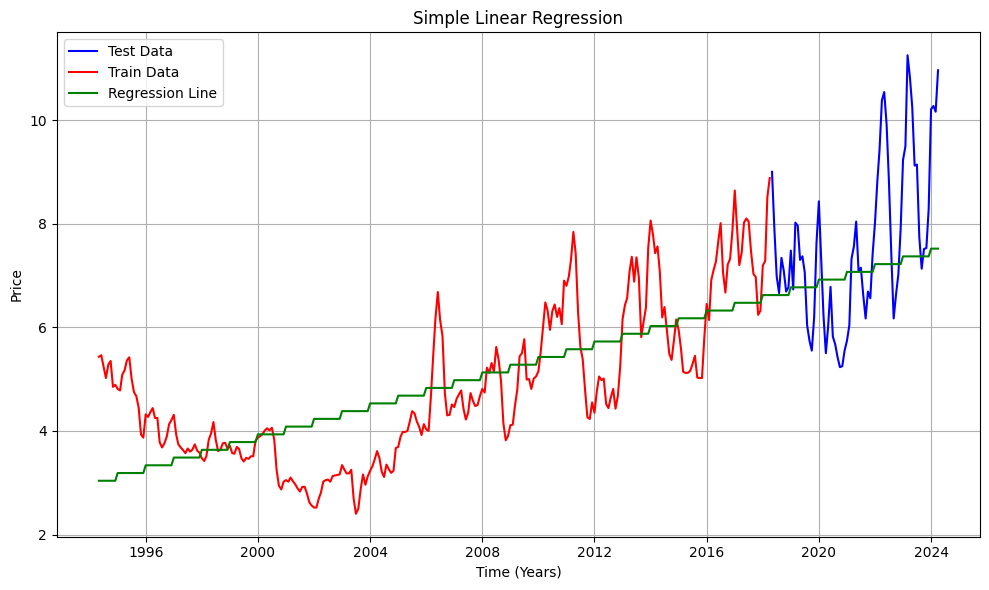

In [186]:
plt.figure(figsize= (10,6))
plt.title('Simple Linear Regression')
plt.xlabel('Time (Years)')
plt.ylabel('Price')
plt.plot(df['Date'][split_point:], df['Price'][split_point:], label= 'Test Data', color= 'blue')
plt.plot(df['Date'][:split_point], df['Price'][:split_point], label= 'Train Data', color= 'red')
plt.plot(df['Date'], reg_line, label= 'Regression Line', color= 'green')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

The plot aims shows how our regression line fits against the training data as well as the testing data. The regression line similar to a step function because we had to fix the month in order to plot against date time, in turn losing some dimensionality. As expected, the simple linear regression does not capture much of the variance or seasonal trends within the data, it simply captures the trivial positive linear trend of salmon price against time. Let us evaluate this model to see how it truly performs.

We will be using the evaluation metrics root mean squared error in a combination with R2 scoring. Root mean squred error is a useful metric because it will be in the same units as our target variable and will explain how close our model is to the actual ouput. R2 score is useful because it explains how our models independent features are able to capture the variance of the target variable, pricing. Now that we have selected our evaluation metrics we are able to proceed. The loss function that will be selected will be mean squared error (mse). This is a common loss function in regression is used for the machine learning models and neural networks.

In [187]:
y_pred = reg.predict(X_test)
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R^{2} Score: {r2_score(y_test, y_pred)}')

Root Mean Squared Error: 1.5165672020572674
R^2 Score: 0.04493412593097201


simple linear regression gives us an rmse of 1.52 and an R2 score of .04. This means that on average, the forecasted data is around 1.52 dollars off the expected data. The R2 score means that the model does not explain the variance of the data well. These numbers suggest that the model is underfitting the data and we need a more complex model to capture these trends

## Multivariate Polynomial Regression

### Model Prepping/Training

Since we need a more complex model and more features, since the simple regression underfit the data, let us turn to polynomial regression with multiple variables. We will be using our cyclic representation of month, as well as the time related features that were strongly correlated with our target variable from our correlation plot.

In [188]:
X_train = df[['Year', 'Month_sin', 'Month_cos','lag_1', 'lag_2','lag_3', 'rolling_avg_3']][:split_point].dropna()
X_test = df[['Year', 'Month_sin', 'Month_cos','lag_1', 'lag_2','lag_3', 'rolling_avg_3']][split_point+3:]
y_train = df['Price'][3:split_point]
y_test = df['Price'][split_point+3:]

X_train drops its first three rows due to null values, so we correct y_train accordingly. Similarly, for X_test, in order to prevent data leakage, we increment the starting position for the testing set by 3, so our lags and rolling averages do not account for any data from the training set. We correct y_test accorindly.

In [189]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree= 2) #plot of date vs price shows a exponential/quadratic curve, so we use degree of 2

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

Polynomial regression is an extension of linear regression so we use this idea to transform our X_train/X_test so we can feed it into a linear regression model and then plot the results

In [190]:
reg = LinearRegression()
reg.fit(X_train_poly, y_train)

LinearRegression()

### Model Evaluation

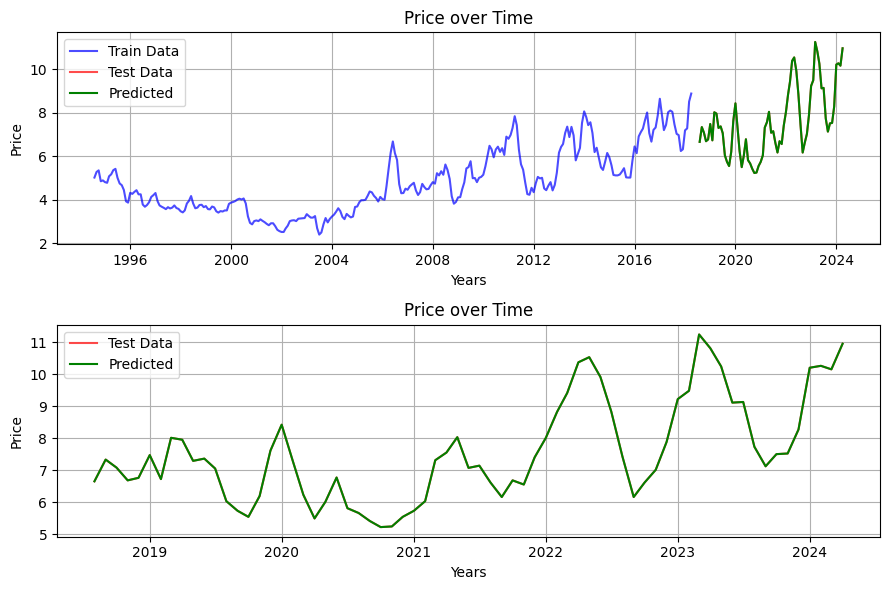

In [191]:
X_train_graph = df['Date'][3:split_point]
X_test_graph = df['Date'][split_point+3:]
y_pred = reg.predict(X_test_poly)

plt.subplots(2,1, figsize= (9,6))
plt.subplot(2,1,1)
plt.title('Price over Time')
plt.plot(X_train_graph, y_train, label= 'Train Data', color= 'blue',alpha= .7)
plt.plot(X_test_graph, y_test, label= 'Test Data', color= 'red',alpha= .7)
plt.plot(X_test_graph, y_pred, label= 'Predicted', color= 'green')
plt.ylabel('Price')
plt.xlabel('Years')
plt.grid()
plt.legend()
plt.tight_layout()

plt.subplot(2,1,2)
plt.title('Price over Time')
plt.plot(X_test_graph, y_test, label= 'Test Data', color= 'red',alpha= .7)
plt.plot(X_test_graph, y_pred, label= 'Predicted', color= 'green')
plt.ylabel('Price')
plt.xlabel('Years')
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

In [192]:
y_pred = reg.predict(X_test_poly)
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R^{2} score: {r2_score(y_test, y_pred)}')

Root Mean Squared Error: 6.859858936483364e-13
R^2 score: 1.0


An R2 score of 1 and RMSE of 0 means that the model perfectly captures the variance of our target variable, however, this does not make sense. This score is way too good and this means that the model is either overfitting the data or there is a data leakage. There most likely is not a data leakage because of the way the training and test splits are set up, so it means that the model must somehow be overfitting the data, which I still question heavily. In order to test this, i will train the model with randomized test targets. If the R2 score is poor for this randomized training, then the model is not overfitting.

In [193]:
y_train_random = np.random.permutation(y_train)

reg.fit(X_train_poly, y_train_random)

y_pred_random = reg.predict(X_test_poly)

print(f"Root Mean Squared Error on randomized data: {np.sqrt(mean_squared_error(y_test, y_pred_random))}")
print(f"R^2 score on randomized data: {r2_score(y_test, y_pred_random)}")

Root Mean Squared Error on randomized data: 3.790790139072959
R^2 score on randomized data: -4.800305118941032


The R2 score is terrible and so is the rmse. This means that the model is not overfitting on the data. This leaves me conlcuding that the model is not overfitting the data and there is not a data leakage, so the feature engineering must reveal great predictive power in addition to the ability of polynomial regression being able to capture such complex trends. However, I am still skeptical and as a result will continue to test more models.

## Gradient Boosting, Random Forest, KNN, and Gaussian Process

In [194]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import MinMaxScaler

#scale data to enhance model performance
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
          'Gradient Boosting Regression': GradientBoostingRegressor(),
          'Random Forest Regression': RandomForestRegressor(),
          'KNearestNeighbors Regression': KNeighborsRegressor(),
          'Gaussian Regression': GaussianProcessRegressor()
         }

### Cross Validation Testing

In [195]:
from sklearn.model_selection import KFold, cross_validate
skf = KFold(n_splits= 5, shuffle= True, random_state= 42)
scoring = {'rmse': 'neg_root_mean_squared_error', 'r2': 'r2'}

for name, model in models.items():
    scores = cross_validate(model, X_train_scaled, y_train, cv= skf, scoring= scoring)
    print('Model Name: ', name)
    print('Average MSE: ', -1*scores['test_rmse'].mean())
    print('Average R^2: ', scores['test_r2'].mean(), '\n')

Model Name:  Gradient Boosting Regression
Average MSE:  0.2646717011416474
Average R^2:  0.9668033472138158 

Model Name:  Random Forest Regression
Average MSE:  0.27251229713986197
Average R^2:  0.964518033783612 

Model Name:  KNearestNeighbors Regression
Average MSE:  0.41347691273525466
Average R^2:  0.9191992472711412 

Model Name:  Gaussian Regression
Average MSE:  0.00604210878803333
Average R^2:  0.9999828129165473 



All the models seem to perform extemely well on the cross validation data sets, with the best being Gaussian Process regression and the worst being KNN regression.

### Model Evaluation

In [196]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print('Model Name: ', name)
    print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R^2: ', model.score(X_test, y_test), '\n')

Model Name:  Gradient Boosting Regression
RMSE:  1.0276733745495308
R^2:  -0.03678524772270242 

Model Name:  Random Forest Regression
RMSE:  1.1106412288742762
R^2:  -0.011669347568746602 

Model Name:  KNearestNeighbors Regression
RMSE:  1.2114553710071325
R^2:  -0.04290985317027718 

Model Name:  Gaussian Regression
RMSE:  0.44829808548008665
R^2:  -23.22259903426139 



On unseen data, the previously best model, gaussian regression performs extremely poorly with such a low R2 score. all the models have negative R2 scores that are close to 0 indicating that the models predictions are less accurate than simply predicting the mean value of the target. However, the rmse scores for the models perform well, so feature engineering is not the issue at hand. I suspect that high volatility of salmon pricing, especially as we previously saw in the graph from polynomial regression. With this being said, the best model to forecast is gradient boosting.

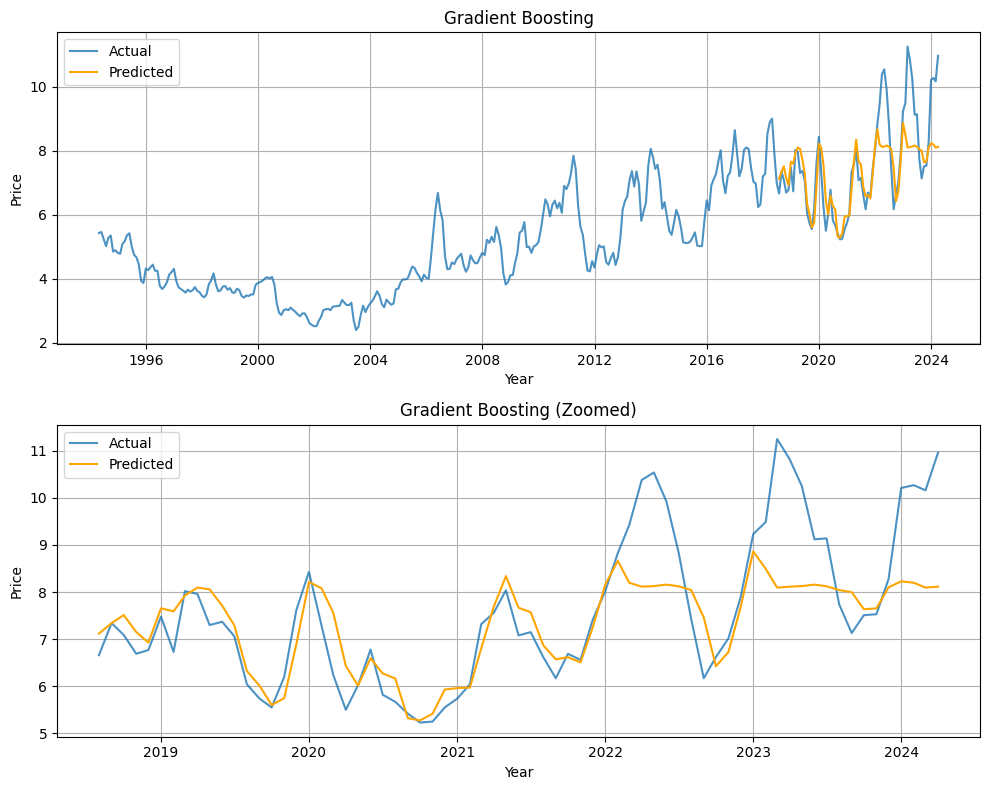

In [197]:
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test_scaled)

Y = {}
for name, model in models.items():
    Y[name] = [None]*len(df[:split_point]) + predictions[name].tolist()


X_test_graph = df['Date'][split_point+3:]
y_test_graph = df['Price'][split_point+3:]


plt.subplots(2,1, figsize= (10, 8))
plt.subplot(2,1,1)
plt.title('Gradient Boosting')
plt.ylabel('Price')
plt.xlabel('Year')
plt.plot(df['Date'], df['Price'], label= 'Actual', alpha= .8)
plt.plot(df['Date'][3:], Y['Gradient Boosting Regression'], label= 'Predicted', color= 'orange')
plt.legend()
plt.grid()
plt.tight_layout()

plt.subplot(2,1,2)
plt.title('Gradient Boosting (Zoomed)')
plt.ylabel('Price')
plt.xlabel('Year')
plt.plot(X_test_graph, y_test_graph, label= 'Actual', alpha= .8)
plt.plot(X_test_graph , predictions['Gradient Boosting Regression'], label= 'Predicted', color= 'orange')
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()

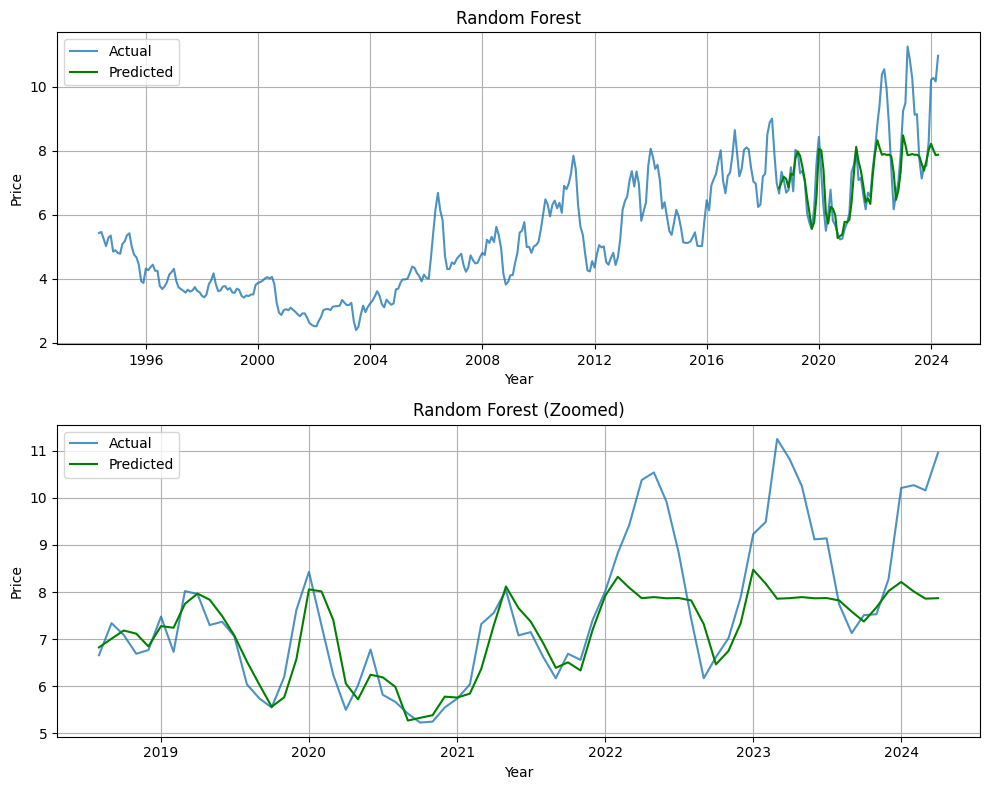

In [198]:
plt.subplots(2,1, figsize= (10,8))
plt.subplot(2,1,1)
plt.title('Random Forest')
plt.ylabel('Price')
plt.xlabel('Year')
plt.plot(df['Date'], df['Price'], label= 'Actual', alpha= .8)
plt.plot(df['Date'][3:], Y['Random Forest Regression'], label= 'Predicted', color= 'green')
plt.legend()
plt.grid()
plt.tight_layout()

plt.subplot(2,1,2)
plt.title('Random Forest (Zoomed)')
plt.ylabel('Price')
plt.xlabel('Year')
plt.plot(X_test_graph, y_test_graph, label= 'Actual', alpha= .8)
plt.plot(X_test_graph, predictions['Random Forest Regression'], label= 'Predicted', color= 'green')
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()

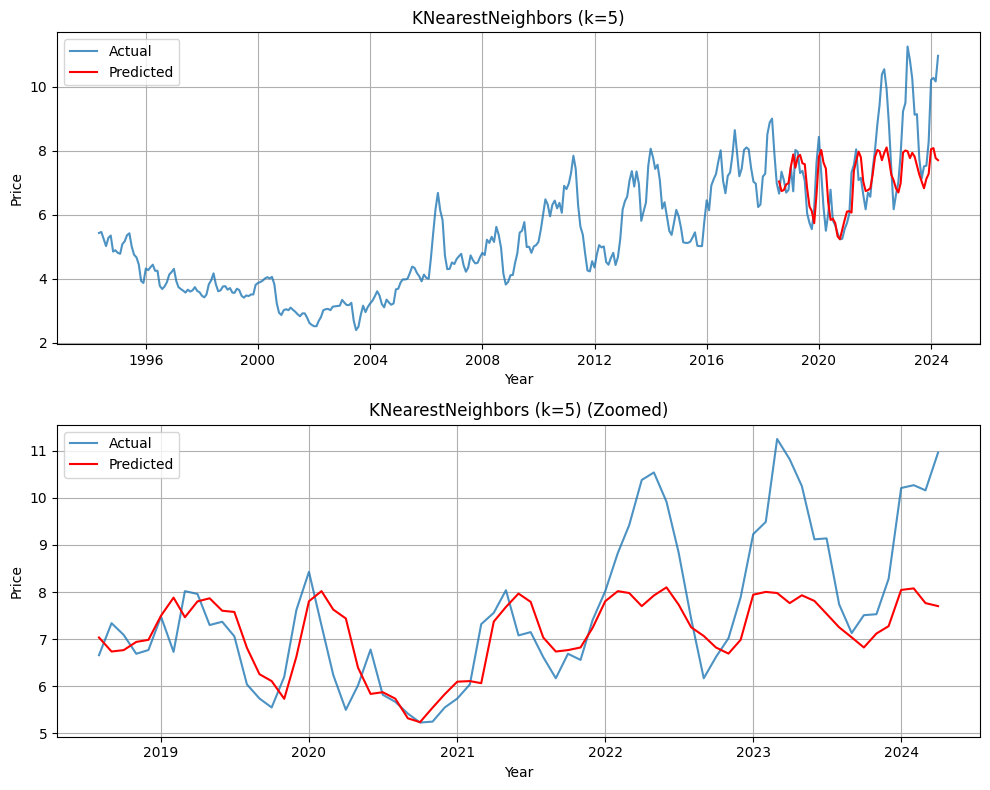

In [199]:
plt.subplots(2,1, figsize= (10,8))
plt.subplot(2,1,1)
plt.title('KNearestNeighbors (k=5)')
plt.ylabel('Price')
plt.xlabel('Year')
plt.plot(df['Date'], df['Price'], label= 'Actual', alpha= .8)
plt.plot(df['Date'][3:], Y['KNearestNeighbors Regression'], label= 'Predicted', color= 'red')
plt.legend()
plt.grid()
plt.tight_layout()

plt.subplot(2,1,2)
plt.title('KNearestNeighbors (k=5) (Zoomed)')
plt.ylabel('Price')
plt.xlabel('Year')
plt.plot(X_test_graph, y_test_graph, label= 'Actual', alpha= .8)
plt.plot(X_test_graph, predictions['KNearestNeighbors Regression'], label= 'Predicted', color= 'red')
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()

For all 3 plots, the general trend of the predicted plot seems to be nearly identical with these models being able to closely predict the actual price values from years 2019-2022, however, after 2022 there is more volatility in price and the models are not able to effectively capture this trend. Solutions to this would be to hyperparameter tune these models to account for this or have more robust feature engineering.

## Neural Networks

In [200]:
import tensorflow as tf
import keras
from keras import layers
from keras import metrics

## Model Architecture

In [201]:
model = keras.Sequential(
    [
        layers.Dense(32, activation= 'relu', name= 'layer1', input_shape= [7]),
        layers.Dense(12, activation= 'relu', name= 'layer2'),
        layers.Dense(1, activation= 'relu' ,name= 'outputlayer')
    ]
)

In [202]:
model.compile(
    optimizer= 'sgd',
    loss= 'mse',
    metrics= [metrics.RootMeanSquaredError() ,metrics.R2Score()]
)

## Model Training

In [203]:
history = model.fit(X_train_scaled, y_train, epochs= 150)

Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 24.1702 - r2_score: -11.0002 - root_mean_squared_error: 4.9159  
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8033 - r2_score: -1.5758 - root_mean_squared_error: 2.3564   
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4445 - r2_score: 0.7855 - root_mean_squared_error: 0.6656 
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3595 - r2_score: 0.8334 - root_mean_squared_error: 0.5992 
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3212 - r2_score: 0.8384 - root_mean_squared_error: 0.5663  
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2709 - r2_score: 0.8767 - root_mean_squared_error: 0.5203 
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2420 - r2_score: 0.8894 - root_mean_squared_error: 0.4914 
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2225 - r2_score: 0.8864 - root_mean_squared_error: 0.4717 
Epoch 9/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

## Model Evaluation

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


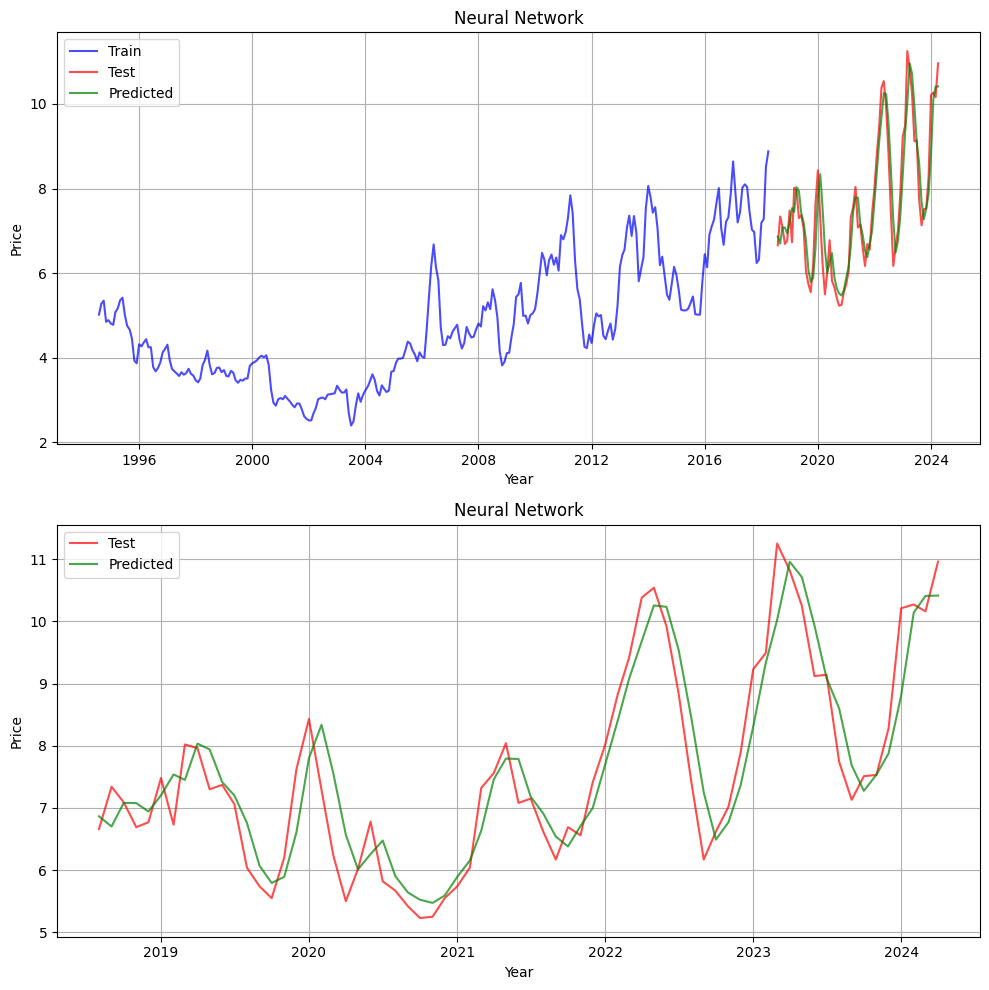

In [204]:
y_pred = model.predict(X_test_scaled)
Y = [None]*len(X_train) + y_pred.tolist()
plt.subplots(2,1, figsize= (10,10))
plt.subplot(2,1,1)
plt.title('Neural Network')
plt.ylabel('Price')
plt.xlabel('Year')
plt.plot(X_train_graph, y_train, label= 'Train', color= 'blue', alpha= .7)
plt.plot(X_test_graph, y_test, label= 'Test', color= 'red', alpha= .7)
plt.plot(X_test_graph, y_pred, label= 'Predicted', color= 'green', alpha= .7)
plt.legend()
plt.grid()
plt.tight_layout()

plt.subplot(2,1,2)
plt.title('Neural Network')
plt.ylabel('Price')
plt.xlabel('Year')
plt.plot(X_test_graph, y_test, label= 'Test', color= 'red', alpha= .7)
plt.plot(X_test_graph, y_pred, label= 'Predicted', color= 'green', alpha= .7)
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()

The neural network model is extremely good at capturing the patterns in the data set. The test vs predicted subplot shows this clearly because the predicted graph follows the same trend the actual data does even in the years after 2022 where price volatility is at its highest. Let us see the metrics to see how well it actually performed.

In [205]:
y_pred = model.predict(X_test_scaled)
nn_pred = y_pred
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R^{2} Score: {r2_score(y_test, y_pred)}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Root Mean Squared Error: 0.5629880471632582
R^2 Score: 0.8720649025909655


As expected from the graph, the evaluation metrics are good. With an rmse of .56 and R2 score of .87, it means that the model captures the variance of the target variable extremely well, and that on average, the difference between the predicted and expected data points from the test set only differ 52 cents. In all scoring metrics the neural network far exceeds the previous sklearn regression models, and is the best regression based model for forecasting.

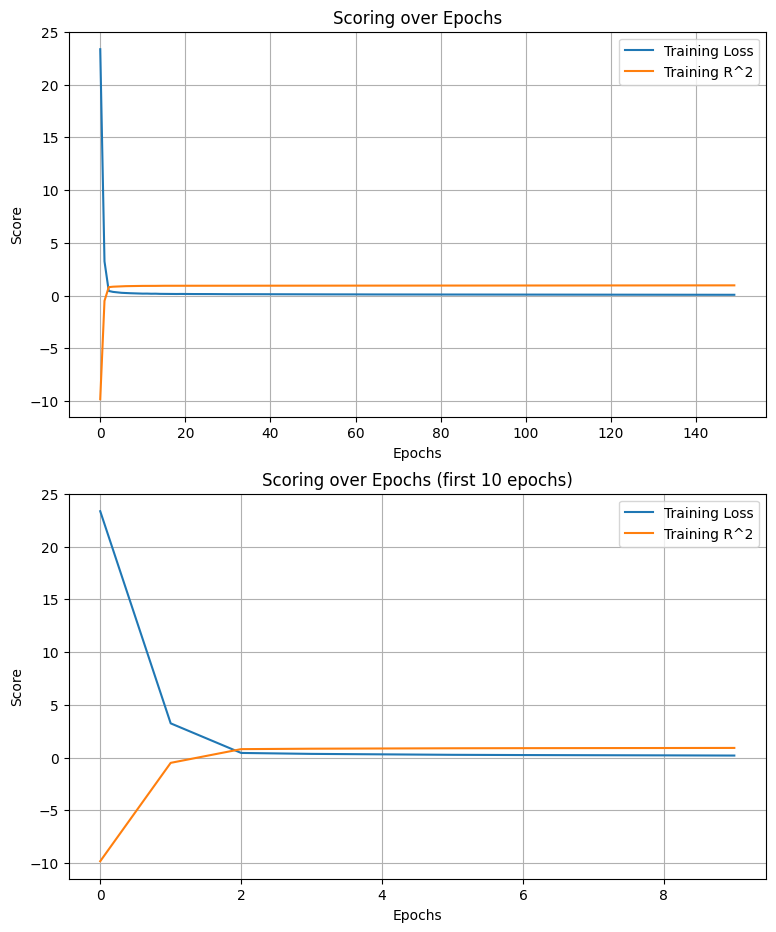

In [206]:
history_df = pd.DataFrame(history.history)

plt.subplots(2,1, figsize= (9,11))
plt.subplot(2,1,1)
plt.title('Scoring over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.plot(history_df['loss'], label= 'Training Loss')
plt.plot(history_df['r2_score'], label= 'Training R^2')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.title('Scoring over Epochs (first 10 epochs)')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.plot(history_df['loss'][:10], label= 'Training Loss')
plt.plot(history_df['r2_score'][:10], label= 'Training R^2')
plt.legend()
plt.grid()

plt.show()

Here we look at how the loss function and R2 score change over each epoch and this shows that the R2 score and loss function intersect at the first epoch and then after that they go on they do not intersect again, as each metric respectively converges to .62 and .84 after this intersection till the 150th epoch.

# Forecasting Methods

## Prophet Model

The first forecasting model will be the FBProphet model

In [207]:
!pip install prophet

### Data preparation

In [208]:
simple = df[['Date', 'Price']].copy()
simple.set_index('Date', inplace= True)
simple.index.name = 'ds'
simple.columns = ['y']
simple.reset_index(inplace= True)
simple.head()

,ds,y
0,1994-05-01,5.43
1,1994-06-01,5.46
2,1994-07-01,5.24
3,1994-08-01,5.02
4,1994-09-01,5.28


In many time series forecasting models, feature engineering is not needed as it is for regression based techniques, as the model is expected to handle this. The prophet model requires a column in date time format named ds and a target column named y. The above cell correctly formats the dataframe, simple, so we can feed it into Prophet.

### Model Training

In [209]:
from prophet import Prophet

simple_train = simple[:split_point]
simple_test = simple[split_point:]

model = Prophet()
model.fit(simple_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq4cwj4dh/ip0qrw99.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq4cwj4dh/vxfwr5gb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95776', 'data', 'file=/tmp/tmpq4cwj4dh/ip0qrw99.json', 'init=/tmp/tmpq4cwj4dh/vxfwr5gb.json', 'output', 'file=/tmp/tmpq4cwj4dh/prophet_modelf_49x749/prophet_model-20250110043635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:36:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:36:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Similar to our regression based techniques, we need to split the data into test and training sets, and we will use the same structure as we did in our regression based techniques with the 80/20 split. Then we are able to feed our training data into the model

In [210]:
simple_forecast = model.predict(simple_test)
simple_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-01,7.389014,6.845858,8.676411,7.389014,7.389014,0.388790,0.388790,0.388790,0.388790,0.388790,0.388790,0.0,0.0,0.0,7.777804
1,2018-06-01,7.412005,6.681126,8.540976,7.412005,7.412005,0.215929,0.215929,0.215929,0.215929,0.215929,0.215929,0.0,0.0,0.0,7.627934
2,2018-07-01,7.434254,6.754090,8.484835,7.433955,7.434899,0.146138,0.146138,0.146138,0.146138,0.146138,0.146138,0.0,0.0,0.0,7.580392
3,2018-08-01,7.457245,6.552609,8.323668,7.456261,7.458656,0.024319,0.024319,0.024319,0.024319,0.024319,0.024319,0.0,0.0,0.0,7.481565
4,2018-09-01,7.480236,6.457915,8.133293,7.478425,7.482898,-0.180824,-0.180824,-0.180824,-0.180824,-0.180824,-0.180824,0.0,0.0,0.0,7.299413


### Model Evaluation

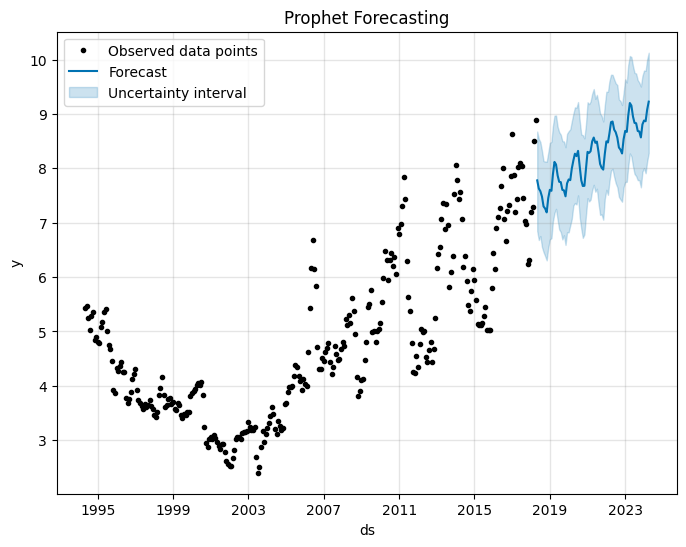

In [211]:
fig, ax = plt.subplots(figsize= (8,6))
ax.set_title('Prophet Forecasting')
ax.set_xlabel('Year')
ax.set_ylabel('Price')
model.plot(simple_forecast, ax= ax)
ax.legend()
plt.show()

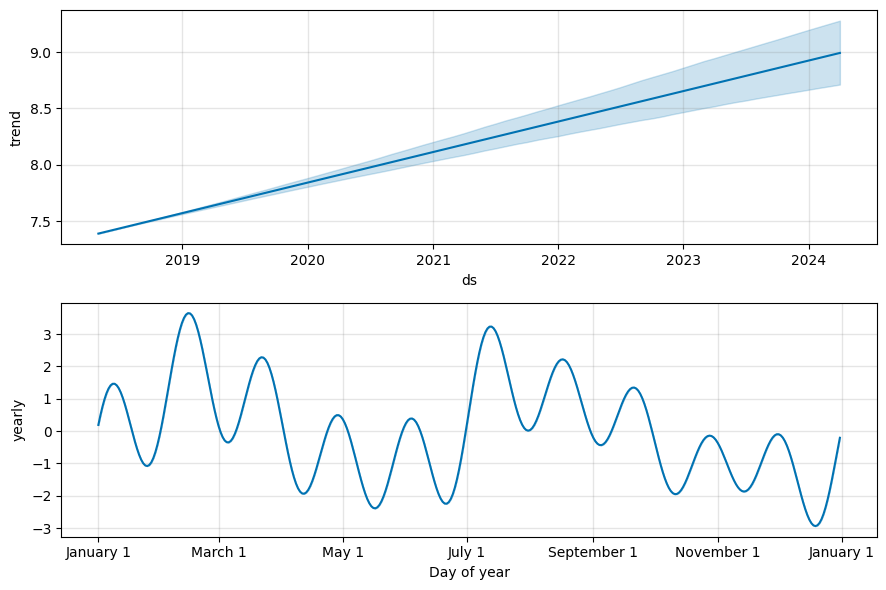

In [212]:
model.plot_components(simple_forecast)
plt.show()

The first plot shows the trend of the models predictions over the testing dates. The second plot shows the seasonality of price throughout the year, so the model predicts a linear and seasonal trend.

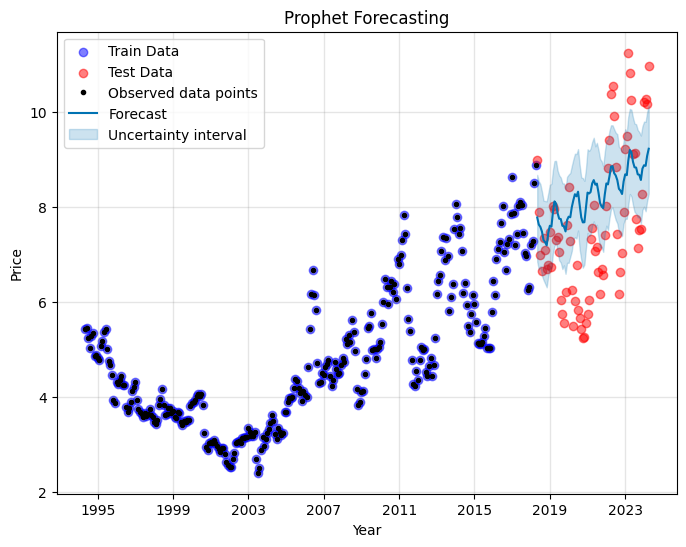

In [213]:
fig, ax = plt.subplots(figsize= (8,6))
plt.scatter(simple_train['ds'], simple_train['y'], label= 'Train Data', color= 'blue', alpha= .5)
plt.scatter(simple_test['ds'], simple_test['y'], label= 'Test Data', color= 'red', alpha= .5)
model.plot(simple_forecast, ax=ax)
ax.set_title('Prophet Forecasting')
ax.set_xlabel('Year')
ax.set_ylabel('Price')
plt.legend()
plt.show()

Here we are able to see how the model predicts compared with the observed data as well as the testing data. When observing the training data and the model forecast, this trend seems to make sense as it continues a positive linear trend with seasonality as previously seen, however, it does not appear to test well with the unseen testing data since the testing data is extremely volatile.

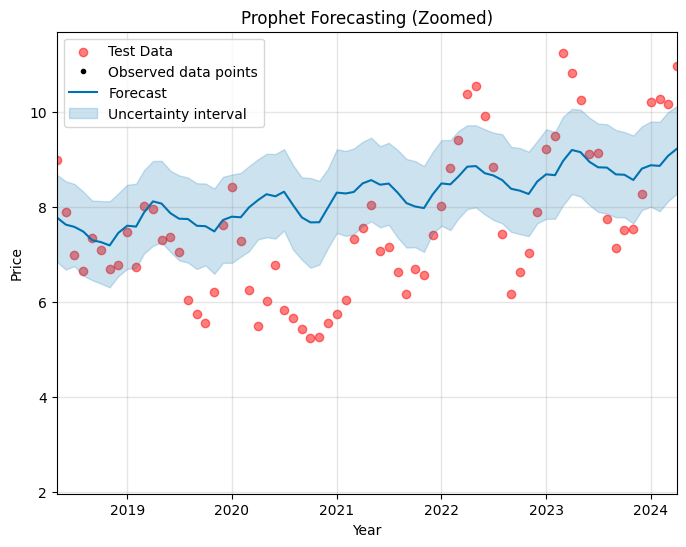

In [214]:
fig, ax = plt.subplots(figsize= (8,6))
ax.scatter(simple_test['ds'], simple_test['y'], label= 'Test Data', color= 'red', alpha= .5)
model.plot(simple_forecast, ax=ax)
ax.set_xbound(lower= simple_test['ds'].min(), upper= simple_test['ds'].max())
ax.set_title('Prophet Forecasting (Zoomed)')
ax.set_xlabel('Year')
ax.set_ylabel('Price')
plt.legend()
plt.show()

In a closer zoom in, its more clear that the prophet model does not forecast the test set accurately. It shows more of a linear trend than adapting to the sharp seasonal patterns in the test set.

In [215]:
print('Prophet:')
print('RMSE: ', np.sqrt(mean_squared_error(simple_test['y'], simple_forecast['yhat'])))
print('R^2: ', r2_score(simple_test['y'], simple_forecast['yhat']))

Prophet:
RMSE:  1.4061187753564182
R^2:  0.178979458984177


As expected, the evaluation metrics show that the prophet model does not perform that well. It performs marginally better than the sklearn regression models but is far worse compared to the neural network model.

## LSTM Forecasting

## Data Preparation

In [216]:
table =df.copy()
table.set_index('Date', inplace= True)
table.head()

,Year,Quarter,Month,Month_sin,Month_cos,Change in decimal,lag_1,lag_2,lag_3,rolling_avg_3,Price
Date,,,,,,,,,,,
1994-05-01,1994,2,5,5.000000e-01,-8.660254e-01,NaN,NaN,NaN,NaN,NaN,5.43
1994-06-01,1994,2,6,1.224647e-16,-1.000000e+00,0.0055,5.43,NaN,NaN,NaN,5.46
1994-07-01,1994,3,7,-5.000000e-01,-8.660254e-01,-0.0403,5.46,5.43,NaN,5.376667,5.24
1994-08-01,1994,3,8,-8.660254e-01,-5.000000e-01,-0.0420,5.24,5.46,5.43,5.240000,5.02
1994-09-01,1994,3,9,-1.000000e+00,-1.836970e-16,0.0518,5.02,5.24,5.46,5.180000,5.28


In [217]:
table = df.copy()
table.set_index('Date', inplace= True)
table = table[['lag_1', 'lag_2', 'lag_3', 'rolling_avg_3', 'Price']].dropna()
table.head()

,lag_1,lag_2,lag_3,rolling_avg_3,Price
Date,,,,,
1994-08-01,5.24,5.46,5.43,5.240000,5.02
1994-09-01,5.02,5.24,5.46,5.180000,5.28
1994-10-01,5.28,5.02,5.24,5.216667,5.35
1994-11-01,5.35,5.28,5.02,5.160000,4.85
1994-12-01,4.85,5.35,5.28,5.030000,4.89


### Model Training

In [218]:
scaler = MinMaxScaler()
table_scaled = pd.DataFrame(scaler.fit_transform(table), columns= table.columns, index= table.index)
table_scaled.head()

,lag_1,lag_2,lag_3,rolling_avg_3,Price
Date,,,,,
1994-08-01,0.320904,0.345763,0.342373,0.328751,0.296045
1994-09-01,0.296045,0.320904,0.345763,0.321472,0.325424
1994-10-01,0.325424,0.296045,0.320904,0.325920,0.333333
1994-11-01,0.333333,0.325424,0.296045,0.319046,0.276836
1994-12-01,0.276836,0.333333,0.325424,0.303275,0.281356


In [219]:
pd.DataFrame(scaler.inverse_transform(table_scaled))

,0,1,2,3,4
0,5.24,5.46,5.43,5.240000,5.02
1,5.02,5.24,5.46,5.180000,5.28
2,5.28,5.02,5.24,5.216667,5.35
3,5.35,5.28,5.02,5.160000,4.85
4,4.85,5.35,5.28,5.030000,4.89
...,...,...,...,...,...
352,7.53,7.51,7.13,7.773333,8.28
353,8.28,7.53,7.51,8.673333,10.21
354,10.21,8.28,7.53,9.586667,10.27
355,10.27,10.21,8.28,10.213333,10.16


In [220]:
X = table_scaled.drop('Price', axis= 1).values
y = table_scaled['Price'].values


X = X.reshape((X.shape[0], 1, X.shape[1]))

In [221]:
split_point = int(len(X)*.8)

X_train = X[:split_point]
X_test = X[split_point+3:] # for lag features
y_train = y[:split_point]
y_test = y[split_point+3:] # for lag features

In [222]:
from tensorflow.keras.layers import LSTM

model = keras.Sequential(
    [
        keras.layers.LSTM(50, activation= 'relu',input_shape= (X_train.shape[1], X_train.shape[2])),
        keras.layers.Dense(1)
    ]
)

In [223]:
model.compile(optimizer= 'adam', loss= 'mse', metrics= [metrics.RootMeanSquaredError(), metrics.R2Score()])

In [224]:
history = model.fit(X_train, y_train, epochs=75, batch_size=32, verbose=1)

Epoch 1/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1011 - r2_score: -2.6426 - root_mean_squared_error: 0.3178
Epoch 2/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0832 - r2_score: -1.9289 - root_mean_squared_error: 0.2884  
Epoch 3/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0684 - r2_score: -1.5329 - root_mean_squared_error: 0.2613
Epoch 4/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0601 - r2_score: -1.1517 - root_mean_squared_error: 0.2446  
Epoch 5/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0443 - r2_score: -0.5639 - root_mean_squared_error: 0.2105  
Epoch 6/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0306 - r2_score: -0.1722 - root_mean_squared_error: 0.1749
Epoch 7/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0201 - r2_score: 0.1936 - root_mean_squared_error: 0.1418
Epoch 8/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - r2_score: 0.4634 - root_mean_squared_error: 0.1229  
Epoch 9/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0

### Model Evaluation

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


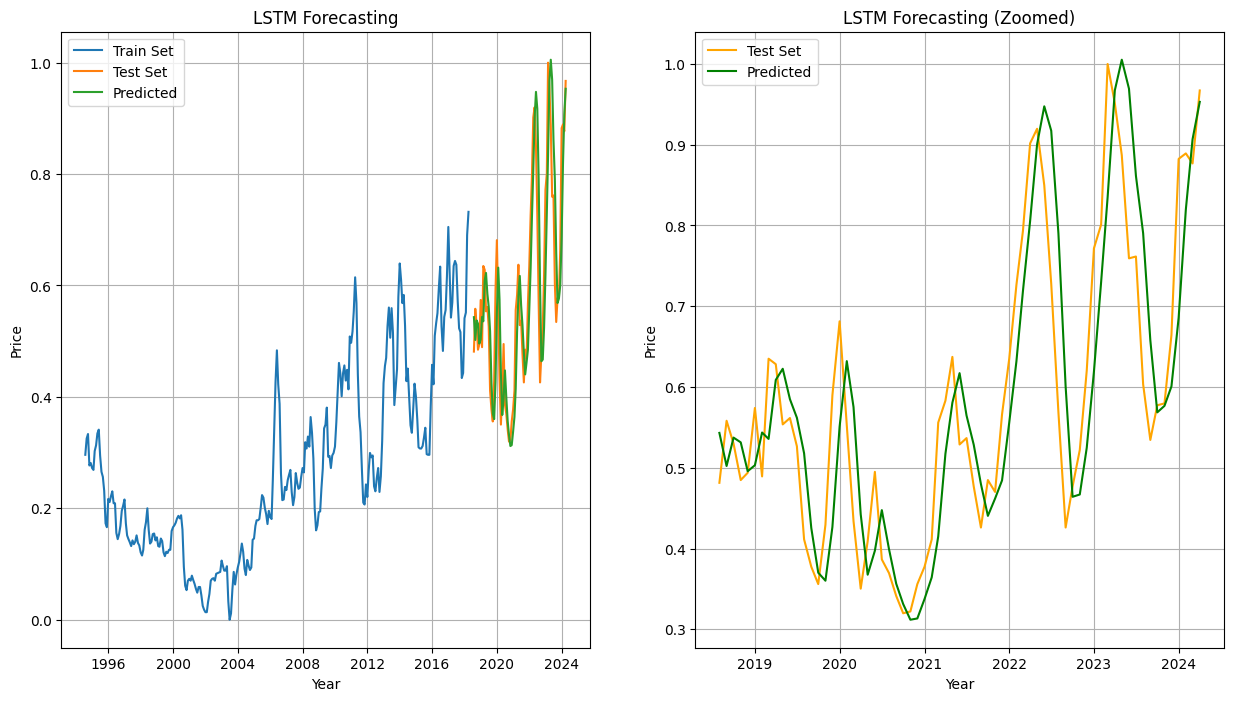

In [229]:
y_pred = model.predict(X_test)
fig, ax= plt.subplots(1,2, figsize= (15,8))

ax[0].plot(X_train_graph, y_train,label= 'Train Set')
ax[0].plot(X_test_graph, y_test,label= 'Test Set')
ax[0].plot(X_test_graph, y_pred,label= 'Predicted')
ax[0].grid()
ax[0].legend()
ax[0].set_title('LSTM Forecasting')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Price')

ax[1].plot(X_test_graph, y_test,label= 'Test Set', color= 'orange')
ax[1].plot(X_test_graph, y_pred,label= 'Predicted', color= 'green')
ax[1].grid()
ax[1].legend()
ax[1].set_title('LSTM Forecasting (Zoomed)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Price')


plt.show()

The model performs extremely well on the unseen testing data, it perfectly captures the trends in the testing data, even in the most volatile price years (2022-2024), this will be the best overall model when it comes to forecasting.

In [226]:
y_pred = model.predict(X_test)
lstm = y_pred
print('LSTM Forecasting: ')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R^{2} Score: {r2_score(y_test, y_pred)}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step
LSTM Forecasting: 
Root Mean Squared Error: 0.09279290317253602
R^2 Score: 0.7277879026386647


When it comes to predicting values, this model is the best, with an rmse of .09, the average prediction was only 9 cents off the actual value which is extremely good. The R2 score is .72, which still encapsulates the variance of the price greatly.

# Conclusions

In [227]:
#unscale predictions for plotting
scaler = MinMaxScaler()
scaler.fit_transform(df[['Price']])
lstm_df = pd.DataFrame(lstm, columns= ['LSTM'], index= X_test_graph)
lstm_unscaled_df = pd.DataFrame(scaler.inverse_transform(lstm_df), columns= ['LSTM'], index= X_test_graph)
lstm_unscaled_df.head()

,LSTM
Date,
2018-08-01,7.207056
2018-09-01,6.844254
2018-10-01,7.155365
2018-11-01,7.103210
2018-12-01,6.786765


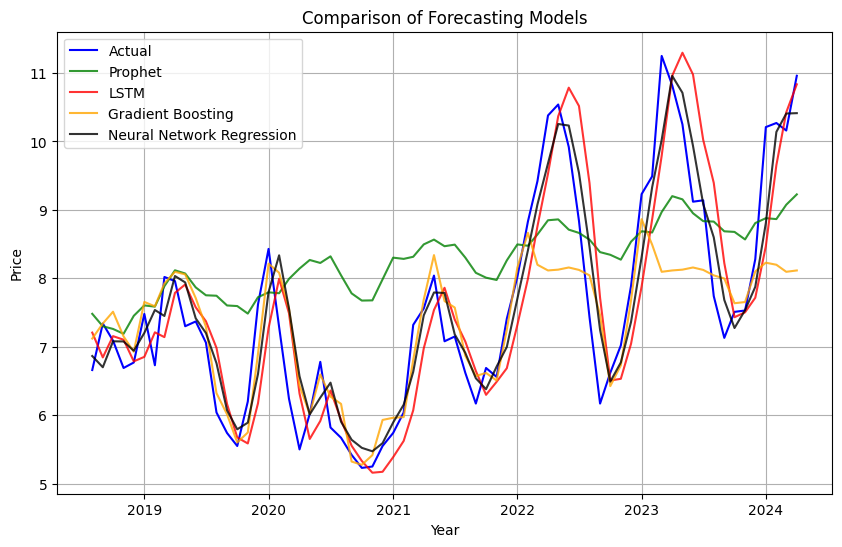

In [228]:
fig, ax = plt.subplots(figsize= (10,6))
ax.set_title('Comparison of Forecasting Models')
ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.plot(X_test_graph, y_test_graph, label= 'Actual', color= 'blue')
ax.plot(X_test_graph, simple_forecast['yhat'][3:], label= 'Prophet', color= 'green', alpha= .8)
ax.plot(X_test_graph, lstm_unscaled_df, label= 'LSTM', color= 'red', alpha= .8)
ax.plot(X_test_graph, predictions['Gradient Boosting Regression'], label= 'Gradient Boosting', color= 'orange', alpha= .8)
ax.plot(X_test_graph, nn_pred, label= 'Neural Network Regression', color= 'black', alpha= .8)
ax.legend()
ax.grid()
plt.show()

Here is a final plot with the best performing models from each section excluding linear regression. It appears that LSTM and neural network regression models perform extremely similar to each other but the LSTM model looks to perform slightly better. The worst performing model from the graph seems to be the prophet model, while the best model are either of the neural network based models, but due to the lower rmse, the LSTM is the overall best model when it comes to salmon price forecasting. Both techniques for time series forecasting provided their benefits and difficulties, however, to choose an overall winner it would have to be neural network based models as they far exceeded the other type of regression and time series based models.